In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from data.data_manager import *
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

noise = .05
# read data
pittsburgh_X, _ = data_tree['pittsburgh']['all_year']

# add gaussian noise to pittsburgh_X and pittsburgh_Y, the gaussian noise depends on the standard deviation of each feature
noised_X = pittsburgh_X + np.random.normal(0, noise*np.std(pittsburgh_X, axis=0), pittsburgh_X.shape)

In [2]:
'''
Compute the the information entropy of both distributions
'''

from scipy.stats import entropy

# Form 100 bins from 14 to 28 for both indoor and outdoor temperature, total 10000 bins
binx = np.linspace(14, 28, 101)
biny = np.linspace(-10, 30, 101)

# count the number of samples in each bin
pittsburgh_count, xedges, yedges = np.histogram2d(
    pittsburgh_X['Zone Air Temperature(SPACE1-1)'], 
    pittsburgh_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
    bins=[binx, biny])

ny_count, xedges, yedges = np.histogram2d(
    noised_X['Zone Air Temperature(SPACE1-1)'], 
    noised_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
    bins=[binx, biny])

# normalize the count to get the probability distribution
pittsburgh_prob = pittsburgh_count / np.sum(pittsburgh_count)
ny_prob = ny_count / np.sum(ny_count)

# print('Pittsburgh probability: ', pittsburgh_prob)
# print('New York probability: ', ny_prob)

# compute the entropy
pittsburgh_entropy = entropy(pittsburgh_prob.flatten())
ny_entropy = entropy(ny_prob.flatten())

print('Pittsburgh entropy: ', pittsburgh_entropy)
print('Noised entropy: ', ny_entropy)

# print kl divergence between the two distributions
print('KL divergence: ', entropy(pittsburgh_prob.flatten(), ny_prob.flatten()))

from scipy.spatial import distance

pitts_JSD = distance.jensenshannon(pittsburgh_prob.flatten(), np.ones(10000) / 10000)
ny_JSD = distance.jensenshannon(ny_prob.flatten(), np.ones(10000) / 10000)
# compute Jensen-Shannon distance between two distributions and uniform distribution
print('Pittsburgh Jensen-Shannon distance: ', distance.jensenshannon(pittsburgh_prob.flatten(), np.ones(10000) / 10000))
print('Noised Jensen-Shannon distance: ', distance.jensenshannon(ny_prob.flatten(), np.ones(10000) / 10000))

# comupte Jensen-Shannon distance between two distributions
JSD = distance.jensenshannon(pittsburgh_prob.flatten(), ny_prob.flatten())
print('Jensen-Shannon distance: ', distance.jensenshannon(pittsburgh_prob.flatten(), ny_prob.flatten()))
print('Jensen-Shannon distance squared: ', distance.jensenshannon(pittsburgh_prob.flatten(), ny_prob.flatten())**2)

Pittsburgh entropy:  7.98643571597185
Noised entropy:  8.254945772306666
KL divergence:  inf
Pittsburgh Jensen-Shannon distance:  0.5386341820515361
Noised Jensen-Shannon distance:  0.5012884736131433
Jensen-Shannon distance:  0.3132418714149252
Jensen-Shannon distance squared:  0.09812047000752454


/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_20644/2592822613.py:35: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_20644/2592822613.py:37: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_20644/2592822613.py:39: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_20644/2592822613.py:41: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


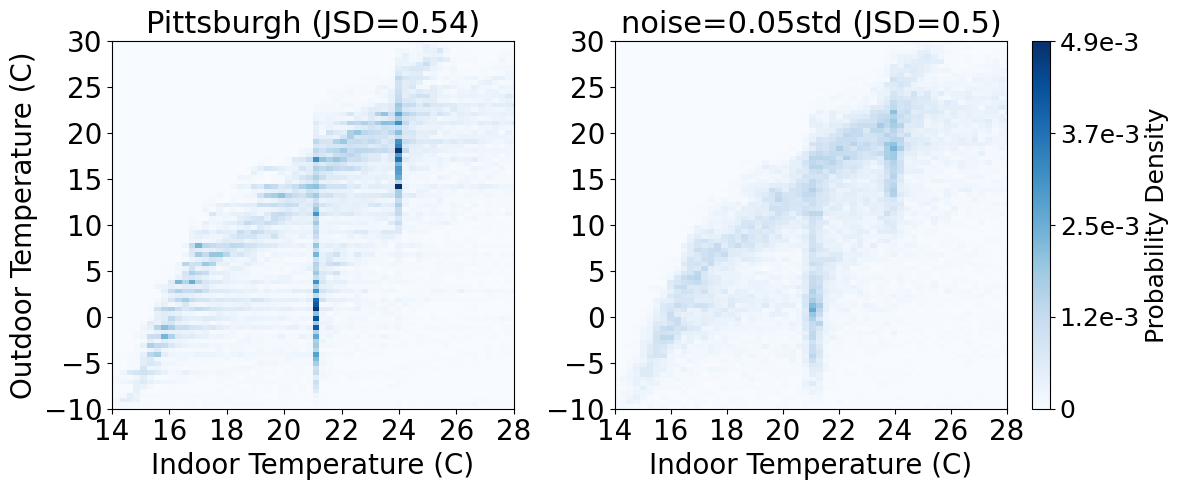

In [3]:
'''
Plot heatmaps of data distribution. 
    X = indoor temperature, Y = outdoor temperature
    Color = hist2d

    Plot pittsburgh and new york on same plot side
    Plot a single color bar representing the density scale
'''

fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1.22]})

plt.subplots_adjust(wspace=0.4)
ax[0].set_title('Pittsburgh (JSD={})'.format(round(pitts_JSD, 2)), fontsize=22)
ax[1].set_title('noise={}std (JSD={})'.format(noise, round(ny_JSD, 2)), fontsize=22)
ax[0].set_xlabel('Indoor Temperature (C)', fontsize=20)
ax[0].set_ylabel('Outdoor Temperature (C)', fontsize=20)
ax[1].set_xlabel('Indoor Temperature (C)', fontsize=20)
# ax[1].set_ylabel('Outdoor Temperature (C)', fontsize=18)
cmap = 'Blues'
ax[0].hist2d(pittsburgh_X['Zone Air Temperature(SPACE1-1)'], 
             pittsburgh_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
             cmap=cmap,
             bins=100, vmin=0, vmax=160)
ax[1].hist2d(noised_X['Zone Air Temperature(SPACE1-1)'], 
             noised_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
             cmap=cmap,
             bins=100, vmin=0, vmax=160)
ax[0].set_xlim(14, 28)
ax[1].set_xlim(14, 28)
ax[0].set_ylim(-10, 30)
ax[1].set_ylim(-10, 30)

# set tick font size
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ticks = [0, 40, 80, 120, 160]/np.sum(pittsburgh_count)
# print(ticks)
cbar = fig.colorbar(ax[1].collections[0], ax=ax[1], ticks=[0, 40, 80, 120, 160])
cbar.ax.set_yticklabels(['0', '1.2e-3', '2.5e-3', '3.7e-3', '4.9e-3'])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('figures/sampling_distribution_heatmap.pdf', dpi=300)

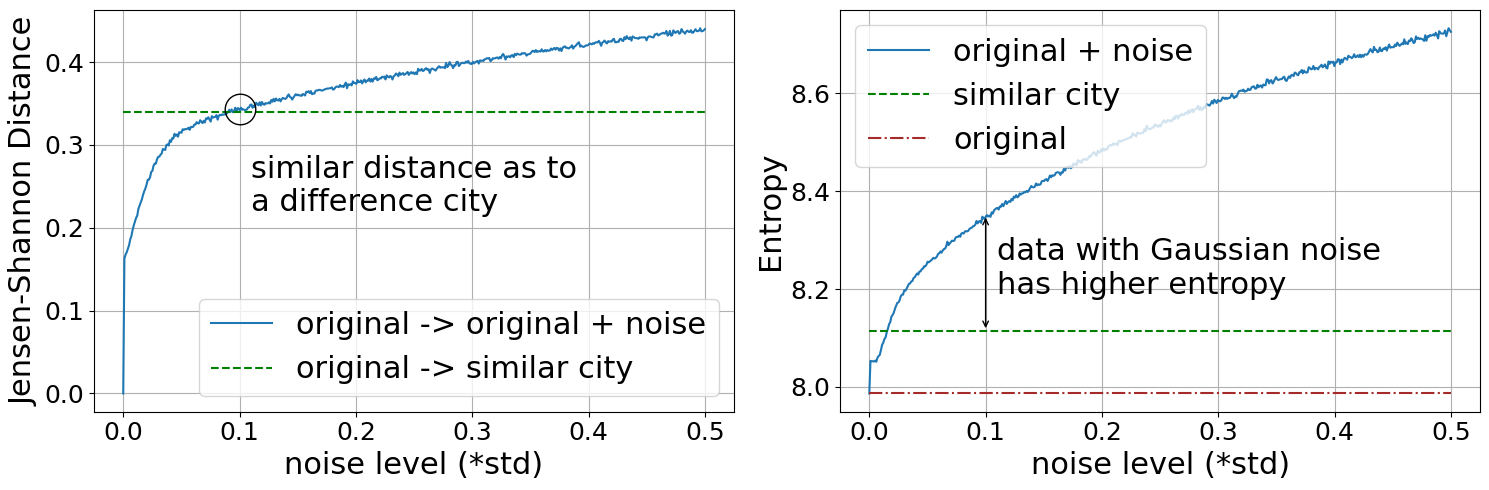

In [4]:
def get_JSD(noise_level):
    # read data
    pittsburgh_X, _ = data_tree['pittsburgh']['all_year']

    # add gaussian noise to pittsburgh_X and pittsburgh_Y, the gaussian noise depends on the standard deviation of each feature
    noised_X = pittsburgh_X + np.random.normal(0, noise_level*np.std(pittsburgh_X, axis=0), pittsburgh_X.shape)

    binx = np.linspace(14, 28, 101)
    biny = np.linspace(-10, 30, 101)

    # count the number of samples in each bin
    pittsburgh_count, xedges, yedges = np.histogram2d(
        pittsburgh_X['Zone Air Temperature(SPACE1-1)'], 
        pittsburgh_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
        bins=[binx, biny])

    ny_count, xedges, yedges = np.histogram2d(
        noised_X['Zone Air Temperature(SPACE1-1)'], 
        noised_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
        bins=[binx, biny])

    # normalize the count to get the probability distribution
    pittsburgh_prob = pittsburgh_count / np.sum(pittsburgh_count)
    ny_prob = ny_count / np.sum(ny_count)

    JSD = distance.jensenshannon(pittsburgh_prob.flatten(), ny_prob.flatten())

    return JSD

def get_entropy(noise_level):
    # read data
    pittsburgh_X, _ = data_tree['pittsburgh']['all_year']

    # add gaussian noise to pittsburgh_X and pittsburgh_Y, the gaussian noise depends on the standard deviation of each feature
    noised_X = pittsburgh_X + np.random.normal(0, noise_level*np.std(pittsburgh_X, axis=0), pittsburgh_X.shape)

    binx = np.linspace(14, 28, 101)
    biny = np.linspace(-10, 30, 101)

    # count the number of samples in each bin
    pittsburgh_count, xedges, yedges = np.histogram2d(
        pittsburgh_X['Zone Air Temperature(SPACE1-1)'], 
        pittsburgh_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
        bins=[binx, biny])

    ny_count, xedges, yedges = np.histogram2d(
        noised_X['Zone Air Temperature(SPACE1-1)'], 
        noised_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
        bins=[binx, biny])

    # normalize the count to get the probability distribution
    ny_prob = ny_count / np.sum(ny_count)
    ny_entropy = entropy(ny_prob.flatten())

    return ny_entropy

# plot JSD vs noise level
noise_levels = np.linspace(0, 0.5, 500)
JSDs = []
entropies = []
for noise_level in noise_levels:
    JSDs.append(get_JSD(noise_level))
    entropies.append(get_entropy(noise_level))



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.grid()
ax2.grid()
ax1.plot(noise_levels, JSDs, label='original -> original + noise')
ax1.set_xlabel('noise level (*std)', fontsize=22)
ax1.set_ylabel('Jensen-Shannon Distance', fontsize=22)
ax1.tick_params(labelsize=18)

ax1.plot(noise_levels, [0.34]*len(noise_levels), '--', color='g', label='original -> similar city')
# ax1.plot(noise_levels, [0.54]*len(noise_levels), '-.', color='brown', label='to uniform')

# draw a vertical line at noise level = 0.05
# ax1.axvline(x=0.1, color='k', linestyle='-.', label='Noise Level = 0.1')

ax1.legend(fontsize=22)

ax2.plot(noise_levels, entropies, label='original + noise')
ax2.set_xlabel('noise level (*std)', fontsize=22)
ax2.set_ylabel('Entropy', fontsize=22)
ax2.tick_params(labelsize=18)

ax2.plot(noise_levels, [8.114200]*len(noise_levels), '--', color='g', label='similar city')
ax2.plot(noise_levels, [7.9864357]*len(noise_levels), '-.', color='brown', label='original')

# draw a circle at noise level = 0.1, JSD = get_JSD(0.1). Do not fill the circle
ax1.plot([0.1], [get_JSD(0.1)], 'o', color='k', fillstyle='none', markersize=22)

ax1.text(0.11, 0.22, 'similar distance as to \na difference city', fontsize=22)

# draw an arrow in ax2 with text
ax2.annotate('',
            xy=(0.1, 8.114200), xycoords='data',
            xytext=(0.1, get_entropy(0.1)), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
ax2.text(0.11, 8.19, 'data with Gaussian noise\nhas higher entropy', fontsize=22)

ax2.legend(fontsize=22, loc='upper left')

plt.tight_layout()
plt.savefig('figures/JSD_vs_noise_level.pdf', dpi=300)
